In [81]:
import numpy as np
import pandas as pd
from math import exp
import textwrap
from random import random
from random import seed
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [82]:
#Load Dataset
dataset = pd.read_table('HW6_Data.txt',delim_whitespace = True)
dataset = dataset.values
dataset_class0 = dataset[dataset[:,2]==0][:]
dataset_class1 = dataset[dataset[:,2]==1][:]
np.random.shuffle(dataset)

In [83]:
print(type(dataset))
print(len(dataset))
print(len(dataset_class0))
print(len(dataset_class1))

<class 'numpy.ndarray'>
399
199
200


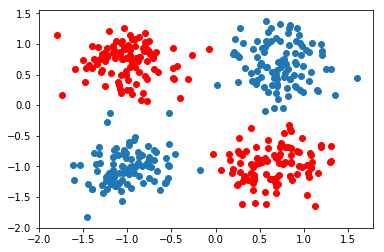

In [87]:
fig = plt.figure()
plt.scatter(dataset_class0[:,0], dataset_class0[:,1])
plt.scatter(dataset_class1[:,0], dataset_class1[:,1], c='r')
plt.show()

In [85]:
#Initialize the network
def create_network(numberOfInputs, numberOfHiddenLayers, NumberofOutputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(numberOfInputs + 1)]} for i in range(numberOfHiddenLayers)]   
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(numberOfHiddenLayers + 1)]} for i in range(NumberofOutputs)]
    network.append(output_layer)
    return network

In [65]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

In [45]:
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

In [46]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [47]:
#Slope of a sigmoid transfer function
def transfer_derivative(output):    
    return output * (1.0 - output)

In [48]:
#Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [49]:
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

In [91]:
def train_network(network, train, l_rate, n_epoch, NumberofOutputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(NumberofOutputs)]
            expected[int(row[-1])] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

In [92]:
# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

In [ ]:
numberOfInputs = len(dataset[0]) - 1
NumberofOutputs = len(set([row[-1] for row in dataset]))
network = create_network(numberOfInputs, 2, NumberofOutputs)
train_network(network, dataset, 0.1, 10000, NumberofOutputs)
w1=list()
w2=list()
b1=list()
i=0
for layer in network:
    print(layer)
    w1.append(layer[0]['weights'][0])
    w2.append(layer[0]['weights'][1])
    b1.append(layer[0]['weights'][2])
    

[13.119182098849027, -12.634868883662426]
[12.761169646780848, 16.681616168142984]
[14.234779313111002, 4.0468052098612475]


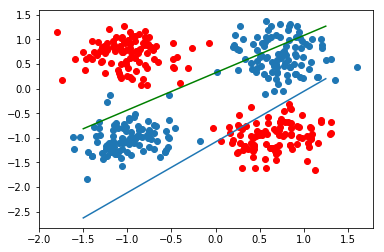

In [111]:
x  = np.arange(-1.5,1.5,0.25)
y  = np.arange(-1.5,1.5,0.25)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
print(w1)
print(w2)
print(b1)
ax = fig.add_subplot(111)
ax.scatter(dataset_class0[:,0], dataset_class0[:,1])
ax.scatter(dataset_class1[:,0], dataset_class1[:,1], c='r')
ax.plot(x, (w1[0]/w2[0])*x-b1[0]/w1[0])
ax.plot(x, (-w1[1]/w2[1])*x-b1[1]/w1[1], c = 'g')
plt.show()